# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.085168e+01     6.507379e+00
 * time: 0.004354000091552734
     1     2.869831e+01     6.495546e+00
 * time: 0.012940168380737305
     2     2.639309e+01     1.073105e+01
 * time: 0.033892154693603516
     3     1.456957e+01     3.096532e+00
 * time: 0.058631181716918945
     4     1.227728e+01     1.185368e+00
 * time: 0.07928013801574707
     5     1.121984e+01     9.071300e-01
 * time: 0.09987306594848633
     6     1.061894e+01     1.252439e+00
 * time: 0.11639213562011719
     7     1.014261e+01     6.699889e-01
 * time: 0.13299107551574707
     8     9.926165e+00     5.662752e-01
 * time: 0.1495990753173828
     9     9.832855e+00     4.183576e-01
 * time: 0.16596221923828125
    10     9.775954e+00     3.956390e-01
 * time: 0.18241000175476074
    11     9.757904e+00     7.026598e-01
 * time: 0.19506502151489258
    12     9.723789e+00     6.770259e-01
 * time: 0.20775103569030762
    13     9.622494e+00     4.592017e-01
 * ti

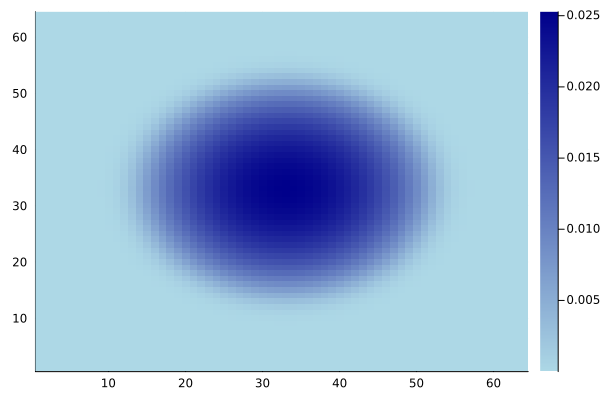

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)